<a href="https://colab.research.google.com/github/Vaida-Savickiene/Vaida-Savickiene/blob/main/Learning_Python_Vaida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary

I wanted to see if I can identify the typical types of customers for one of our brands using world cloud with customer company names. 

Inspiration: An article by Andreas Mueller: "A Wordcloud in Python" 
[link](https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html)

Note: Company name is not considered to be PII, and therefore GDPR does not apply.


## Step 1: Authenticate google colab 

By running the code below you are authenticating use of googe colab with your google account. 

In [3]:
## Code to install necessary libraries and perform authorization

"""
When you run this code, you will be asked to authenticate which can be done by 
clicking the click outputed and copy pasting the access code. Sometime you have to do this couple of time to gain access

If you ran this code after successful authentication during your session,
when asked for verification code without any link to browser, enter your google password
"""

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


## Step 2:  Setting working directory

In [4]:
## Mount google drive 
!mkdir -p drive 
!google-drive-ocamlfuse drive

In [17]:
## Setting the working directory
import os
os.chdir("/content/drive/Colab Notebooks/Test") 

## Step 3: Import Packages

In [18]:
#The package that allows to mask the cloud into any shape of your choice
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install setup.py

Cloning into 'word_cloud'...
remote: Enumerating objects: 6527, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 6527 (delta 38), reused 59 (delta 21), pack-reused 6441
Receiving objects: 100% (6527/6527), 116.94 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (3869/3869), done.
Checking out files: 100% (95/95), done.
ERROR: Could not find a version that satisfies the requirement setup.py (from versions: none)
ERROR: No matching distribution found for setup.py


In [19]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [22]:
# Load in the dataframe
df = pd.read_csv("/content/drive/Colab Notebooks/Test/KL_company_names.csv", index_col=0)

In [23]:
# Looking at first 5 rows of the dataset
df.head()

,Description
Id,
1,BURTONS FOODS LTD
2,MR R F SMITHURST
3,CHRIS MANSON
4,BLACKPOOL ROOF TECH & BLD LTD
5,MR R SMITH


In [24]:
#You can printout some basic information about the dataset using print() combined with .format() to have a nice printout.

print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))


There are 5363 observations and 1 features in this dataset. 



##STEP 4: Generate Word Cloud using Company Names

In [25]:
text = " ".join(name for name in df.Description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 116277 words in the combination of all review.


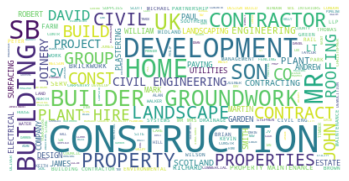

In [26]:
# The words that will be eliminated. If None, the build-in STOPWORDS list will be used.
# Here we can apply business knowledge and remove non-value adding words
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["LTD", "LIMITED", "SERVICES", "MR ", "SOLUTION", "SOLUTIONS", " UK", "AND", "(STAFF)"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
#Change the form of the output 
circle_mask = np.array(Image.open("/content/drive/Colab Notebooks/Black-Circle.png"))
circle_mask

array([[[252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        ...,
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255]],

       [[252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        ...,
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255]],

       [[252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        ...,
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255]],

       ...,

       [[252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        ...,
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255]],

       [[252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        ...,
        [252, 255, 254, 255],
        [252, 255, 254, 255],
        [252, 255, 254, 255]],

       [[252

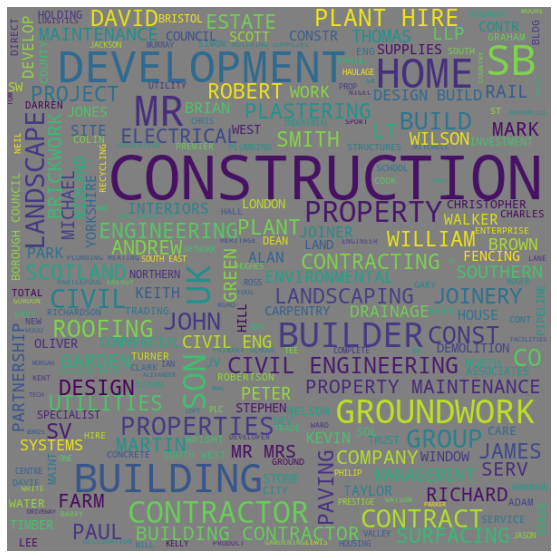

In [41]:
# Create a word cloud image
wc = WordCloud(background_color="grey", max_words=250, mask=circle_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file(path.join("/content/drive/Colab Notebooks/Test/", "KL_Word_Cloud.png"))

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()